In [1]:
import pandas as pd

In [2]:
xls = pd.ExcelFile('data.xlsx')

xls.sheet_names

df = {}
for num in xls.sheet_names[1:-1]:
    df[num] = pd.read_excel(xls, num) 

for key in df:
    df[key]['SyncDate'] = pd.to_datetime(df[key]['SyncDate'])
    df[key].sort_values(by='SyncDate', ascending=True, inplace=True)
    df[key]['SyncDate'] = df[key]['SyncDate'].dt.floor('H')
    df[key] = df[key].resample('H', on = 'SyncDate').mean()
    df[key].drop_duplicates(inplace=True)

In [3]:
df_combined = pd.DataFrame()
for key in df:
    df_combined = df_combined.append(df[key], ignore_index=True)

### Naive Radon clustering as individual space-time points

In [4]:
from sklearn.cluster import KMeans

In [9]:
import numpy as np
values = df_combined['Radon'].values
values = values[~(np.isnan(values))]
values = values.reshape(-1,1)

In [10]:
values

array([[  0.5],
       [  0.5],
       [  0.6],
       ...,
       [123.1],
       [126.4],
       [128. ]])

In [11]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

In [12]:
import matplotlib.pyplot as plt

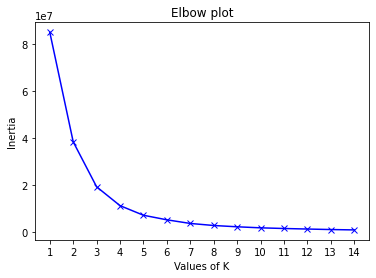

In [13]:
plt.plot([i for i in range(1,15)], wcss, 'bx-')
plt.xlabel('Values of K')
plt.xticks([i for i in range(1,15)])
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, init='k-means++')

In [15]:
kmeans.fit(values)

KMeans(n_clusters=4)

In [19]:
kmeans.cluster_centers_

array([[ 43.21810491],
       [348.14615385],
       [139.09718129],
       [  7.78232783]])

# 32, 30, 50, 2, 5, 1 - Interesting nodes

In [35]:
interesting_nodes = [32, 30, 50, 2, 5, 1]

In [36]:
df_radon = pd.DataFrame(index=df['50'].index)
df_radon['Radon'] = df['32']["Radon"].interpolate(option='spline')
values = df_radon['Radon'].values
values = values[~(np.isnan(values))]
values = values.reshape(-1,1)

In [37]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

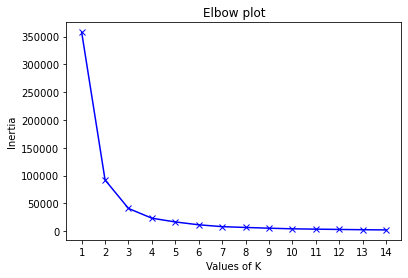

In [38]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1,15)], wcss, 'bx-')
plt.xlabel('Values of K')
plt.xticks([i for i in range(1,15)])
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [40]:
kmeans.fit(values)

KMeans(n_clusters=3)

In [41]:
kmeans.cluster_centers_

array([[ 8.69969079],
       [64.89565217],
       [26.96029412]])

In [42]:
df_radon = pd.DataFrame(index=df['50'].index)
df_radon['Radon'] = df['30']["Radon"].interpolate(option='spline')
values = df_radon['Radon'].values
values = values[~(np.isnan(values))]
values = values.reshape(-1,1)

In [43]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

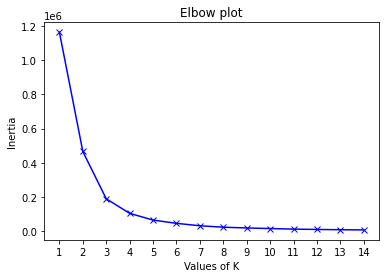

In [44]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1,15)], wcss, 'bx-')
plt.xlabel('Values of K')
plt.xticks([i for i in range(1,15)])
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [46]:
kmeans.fit(values)

KMeans(n_clusters=3)

In [47]:
kmeans.cluster_centers_

array([[ 9.13409091],
       [91.88601399],
       [38.20429646]])

In [84]:
df_radon = pd.DataFrame(index=df['50'].index)
df_radon['Radon'] = df['50']["Radon"].interpolate(option='spline')
values = df_radon['Radon'].values
values = values[~(np.isnan(values))]
values = values.reshape(-1,1)

In [85]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

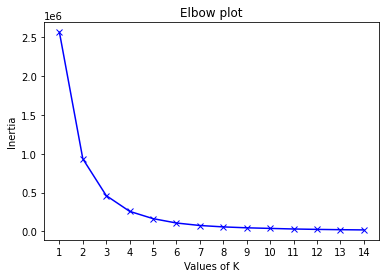

In [86]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1,15)], wcss, 'bx-')
plt.xlabel('Values of K')
plt.xticks([i for i in range(1,15)])
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

In [87]:
kmeans = KMeans(n_clusters=4, init='k-means++')

In [88]:
kmeans.fit(values)

KMeans(n_clusters=4)

In [89]:
kmeans.cluster_centers_

array([[ 30.07968158],
       [247.2952381 ],
       [ 64.26805054],
       [135.33305085]])

In [78]:
df_radon = pd.DataFrame(index=df['50'].index)
df_radon['Radon'] = df['5']["Radon"].interpolate(option='spline')
values = df_radon['Radon'].values
values = values[~(np.isnan(values))]
values = values.reshape(-1,1)

In [79]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

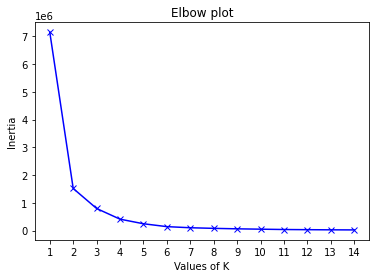

In [80]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1,15)], wcss, 'bx-')
plt.xlabel('Values of K')
plt.xticks([i for i in range(1,15)])
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

In [81]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [82]:
kmeans.fit(values)

KMeans(n_clusters=3)

In [83]:
kmeans.cluster_centers_

array([[134.38426966],
       [357.225     ],
       [  9.66696905]])

In [60]:
df_radon = pd.DataFrame(index=df['50'].index)
df_radon['Radon'] = df['1']["Radon"].interpolate(option='spline')
values = df_radon['Radon'].values
values = values[~(np.isnan(values))]
values = values.reshape(-1,1)

In [61]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

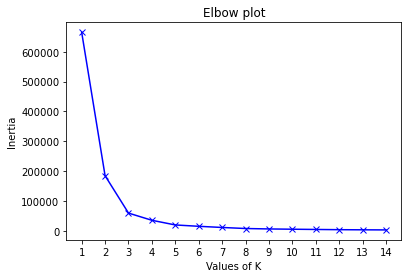

In [62]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1,15)], wcss, 'bx-')
plt.xlabel('Values of K')
plt.xticks([i for i in range(1,15)])
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

In [63]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [64]:
kmeans.fit(values)

KMeans(n_clusters=3)

In [65]:
kmeans.cluster_centers_

array([[  6.08214286],
       [163.30526316],
       [ 49.48470588]])

In [72]:
df_radon = pd.DataFrame(index=df['50'].index)
df_radon['Radon'] = df['2']["Radon"].interpolate(option='spline')
values = df_radon['Radon'].values
values = values[~(np.isnan(values))]
values = values.reshape(-1,1)

In [73]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

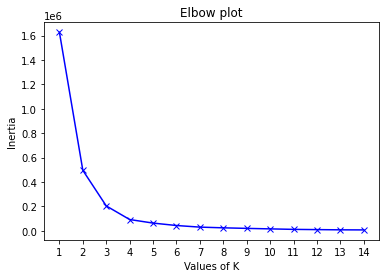

In [74]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(1,15)], wcss, 'bx-')
plt.xlabel('Values of K')
plt.xticks([i for i in range(1,15)])
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

In [75]:
kmeans = KMeans(n_clusters=4, init='k-means++')

In [76]:
kmeans.fit(values)

KMeans(n_clusters=4)

In [77]:
kmeans.cluster_centers_

array([[  3.31259124],
       [238.82727273],
       [ 19.9844376 ],
       [ 69.77191011]])

,Radon
SyncDate,
2022-05-11 18:00:00,0.0
2022-05-11 19:00:00,6.9
2022-05-11 20:00:00,8.2
2022-05-11 21:00:00,9.6
2022-05-11 22:00:00,8.7
...,...
2022-08-07 19:00:00,113.6
2022-08-07 20:00:00,119.2
2022-08-07 21:00:00,123.1
